# **mount google drive for data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#importing important libraries
import cv2
import numpy as np
from math import floor
from google.colab.patches import cv2_imshow
import matplotlib.image as img
from matplotlib import pyplot as plt
import math

# **Q1) 1) Image Zooming : NEAREST NEIGHBOUR**

In [ ]:
def zooming(img):
  width, height = img.shape[:2];

  xNew = int(width * 1.5);
  yNew = int(height * 1.5);

  xScale = xNew/(width-1);
  yScale = yNew/(height-1);

  newImage = np.zeros([xNew, yNew, 3]);

  for i in range(xNew-1):
    for j in range(yNew-1):
	    newImage[i + 1, j + 1]= img[1 + int(i / xScale), 1 + int(j / yScale)]
  return newImage


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food6.jpeg");
zoom_1 = zooming(img)

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",zoom_1.shape)

original image shape:>  (776, 600, 3)
new image shape:>  (1164, 900, 3)


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food7.jpeg");
zoom_2 = zooming(img)

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",zoom_2.shape)

original image shape:>  (750, 600, 3)
new image shape:>  (1125, 900, 3)


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food8.jpeg");
zoom_3 = zooming(img)

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",zoom_3.shape)

original image shape:>  (400, 600, 3)
new image shape:>  (600, 900, 3)


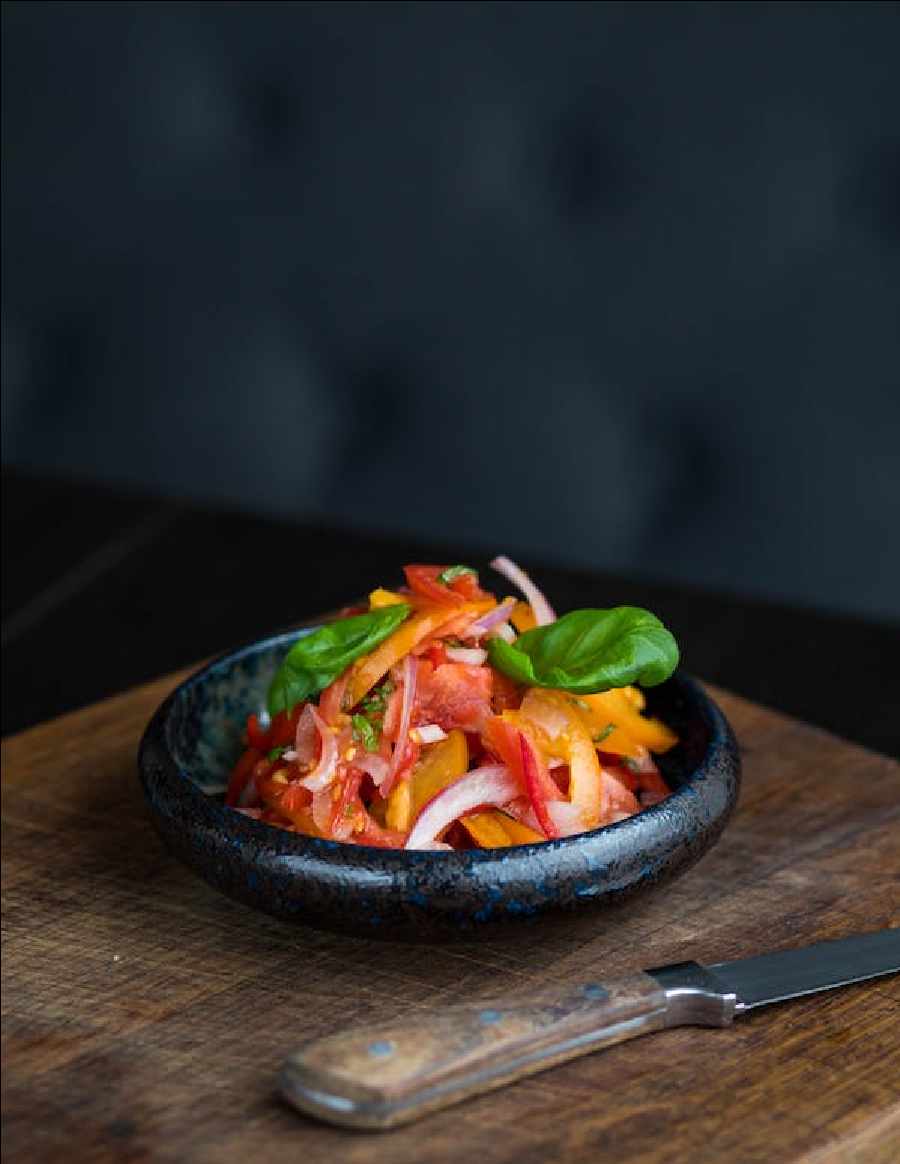

In [ ]:
cv2_imshow(zoom_1)

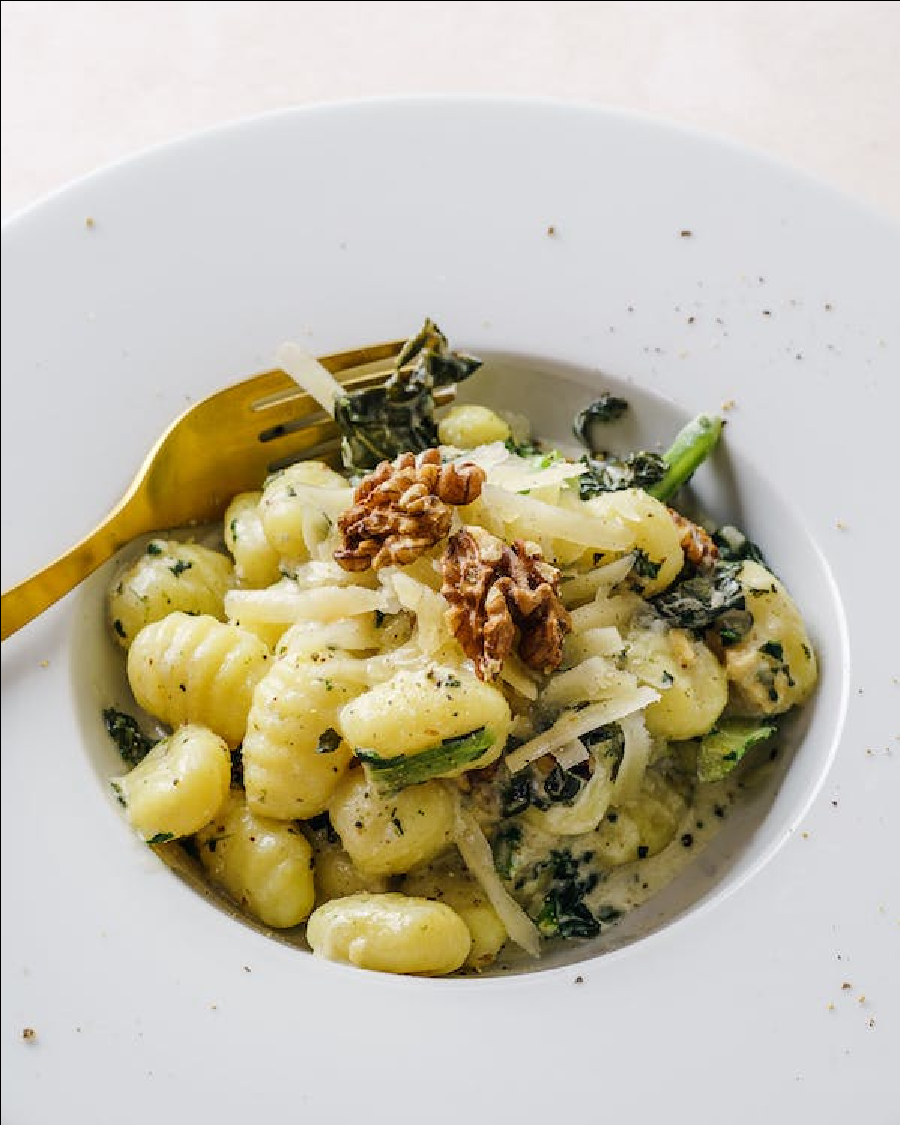

In [ ]:
cv2_imshow(zoom_2)

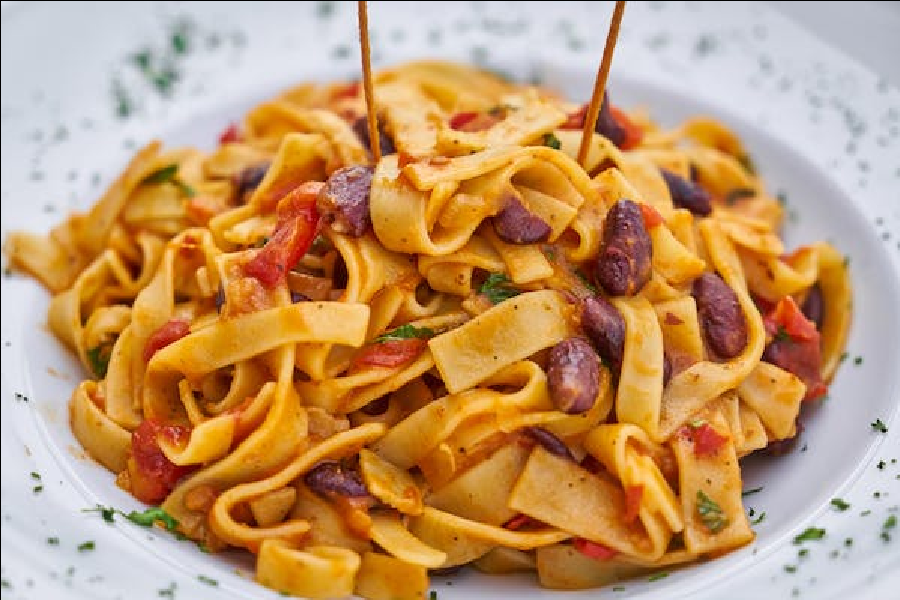

In [ ]:
cv2_imshow(zoom_3)

# **Q1) 2) Image Zooming : BILINEAR INTERPOLATION**

In [ ]:
def bl_resize(original_img, new_h, new_w):
	old_h, old_w, c = original_img.shape
	resized = np.zeros((new_h, new_w, c))
	w_scale_factor = (old_w ) / (new_w ) 
	h_scale_factor = (old_h ) / (new_h ) 
	for i in range(new_h):
		for j in range(new_w):
			x = i * h_scale_factor
			y = j * w_scale_factor
			x_floor = math.floor(x)
			x_ceil = min( old_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(old_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x), int(y), :]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x), int(y_floor), :]
				q2 = original_img[int(x), int(y_ceil), :]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor), int(y), :]
				q2 = original_img[int(x_ceil), int(y), :]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor, y_floor, :]
				v2 = original_img[x_ceil, y_floor, :]
				v3 = original_img[x_floor, y_ceil, :]
				v4 = original_img[x_ceil, y_ceil, :]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j,:] = q
	return resized.astype(np.uint8)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food8.jpeg");
w, h = img.shape[:2]
bi_1 = bl_resize(img, int(w*1.5), int(h*1.5))

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",bi_1.shape)

original image shape:>  (400, 600, 3)
new image shape:>  (600, 900, 3)


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food7.jpeg");
w, h = img.shape[:2]
bi_2 = bl_resize(img, int(w*1.5), int(h*1.5))

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",bi_2.shape)

original image shape:>  (750, 600, 3)
new image shape:>  (1125, 900, 3)


In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food3.jpeg");
w, h = img.shape[:2]
bi_3 = bl_resize(img, int(w*1.5), int(h*1.5))

In [ ]:
print("original image shape:> ",img.shape)
print("new image shape:> ",bi_3.shape)

original image shape:>  (450, 600, 3)
new image shape:>  (675, 900, 3)


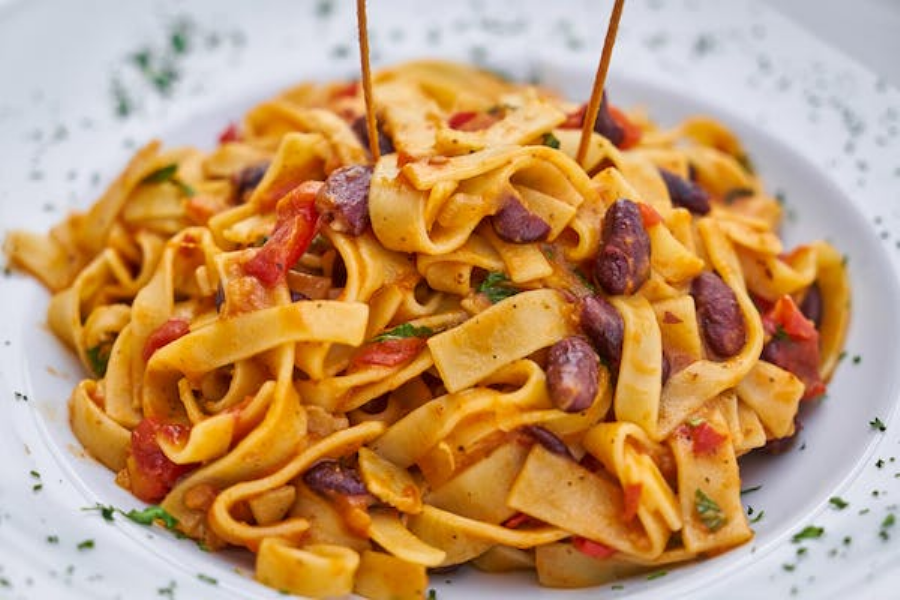

In [ ]:
cv2_imshow(bi_1)

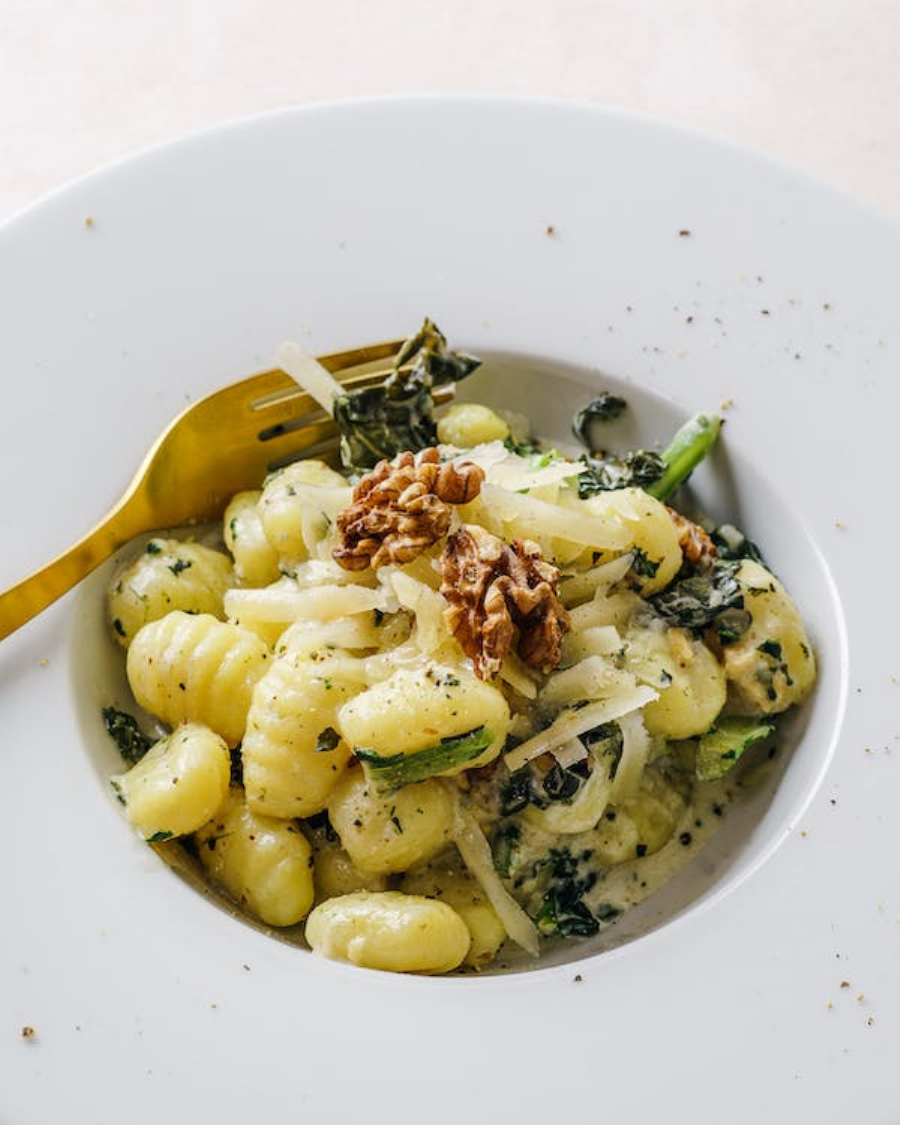

In [ ]:
cv2_imshow(bi_2)

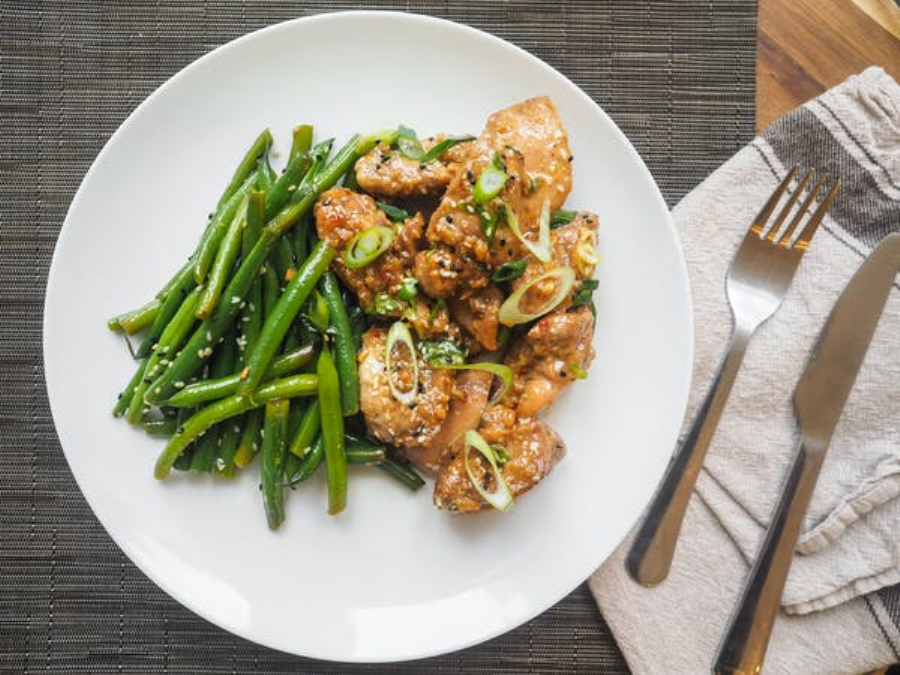

In [ ]:
cv2_imshow(bi_3)

# Side by side comparison of image zoomed using bilinear interpolation vs nearest neoghbour

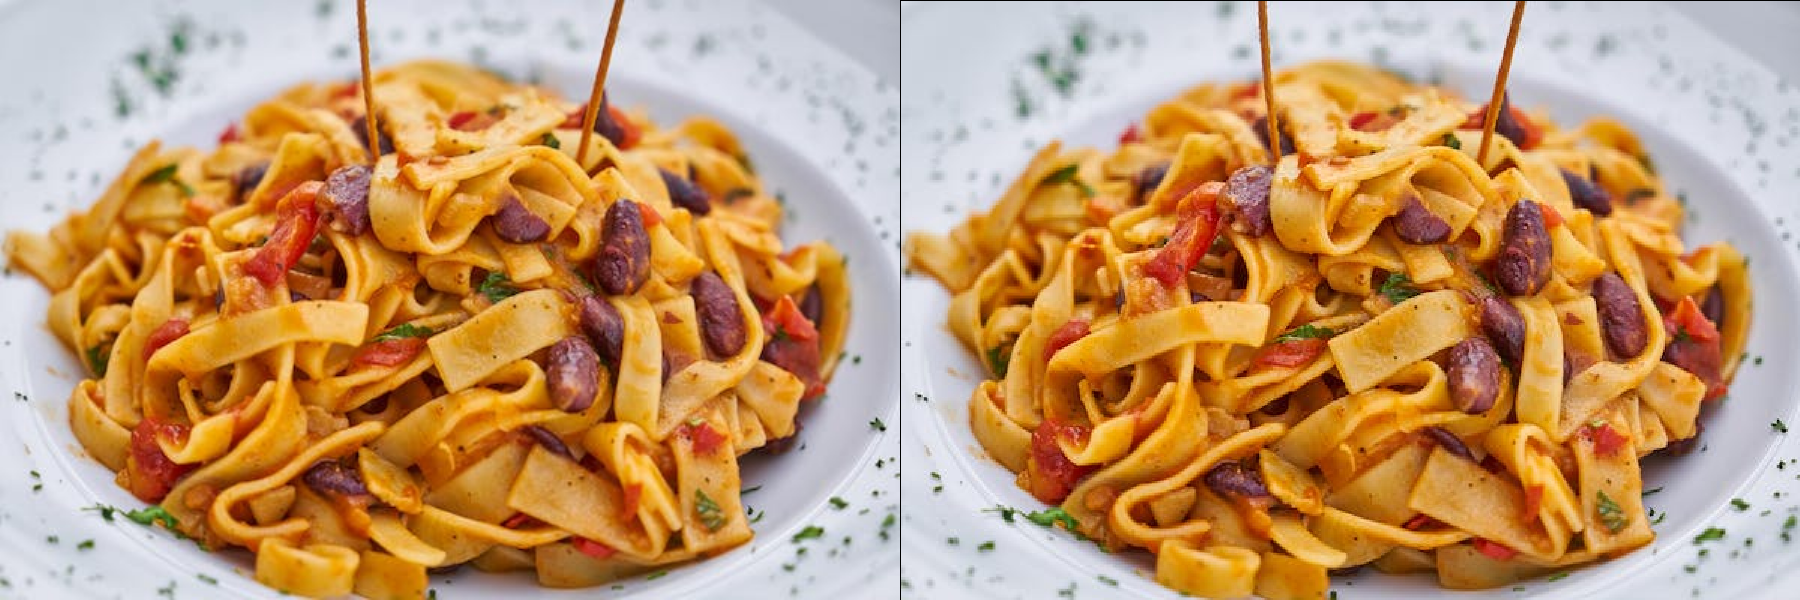

-1

In [ ]:
Hori = np.concatenate((bi_1, zoom_3), axis=1)
cv2_imshow( Hori)
cv2.waitKey(0)


## Comment on the quality of the two techniques and compare their computational complexity:

As we can see above the two image have few differences. Mostly the bilinear interpolation gives a little bit better results as it computes the pixel value using the 4 nearest neigbours and also taking in their weighted average whereas the nearest neighbour only consider the near neigbours based upon the zooming factor. Here in this image the bilinear interpolation still maintains the edges of the chopsticks sharply as xompared to nearest neighbour. Also the parsley leaves look more criper in the former method.

Computationaly bilinear interpolation is a bit costly as it keeps computing the nearest 4 neighbours and also adds up the weighted average of those 4 pixels.
whereas nearest neighbour only consider the neearest pixel and simply copies it.





# **Q2) 1) function to compute the histogram of an image and plot the same**

In [ ]:
def histogram(img):
  h = [0]*256                      
  for x in range(img.shape[0]):        
    for y in range(img.shape[1]):            
      i = img[x,y]                  
      h[i] = h[i] + 1

  return h

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food1.jpeg")
hist_blue = histogram(img[:,:,0])
hist_green = histogram(img[:,:,1])
hist_red = histogram(img[:,:,2])

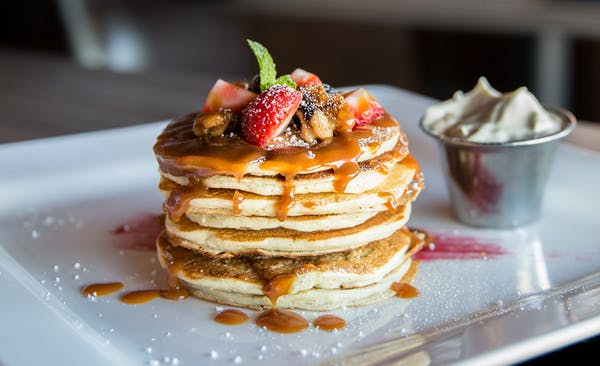

In [ ]:
cv2_imshow(img)

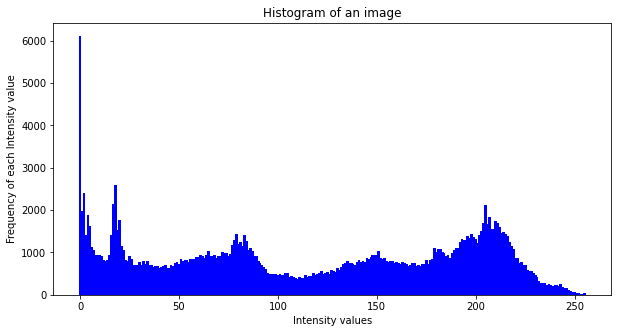

In [ ]:
#histogram for blue channel
fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(256)), hist_blue, color ='blue',width = 1.4)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an image')
plt.show()

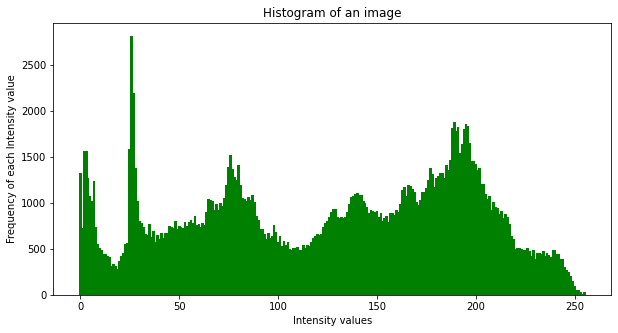

In [ ]:
##histogram for green channel
fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(256)), hist_green, color ='green',width = 1.4)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an image')
plt.show()

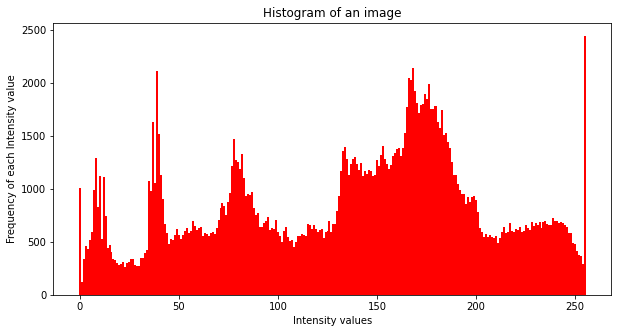

In [ ]:
#histogram for red channel
fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(256)), hist_red, color ='red',width = 1.0)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an image')
plt.show()

# Modality of the histogram for each channel is computed below. As the number of peaks are high in number find_peaks gives us the accurate number of peaks for each channel of the image

In [ ]:
from scipy.signal import find_peaks
def mod(img):
  hist, bin_edges = np.histogram(img, bins=256)
  peaks, _ = find_peaks(hist)

  num_peaks = len(peaks)
  print("The number of peaks in the histogram is:", num_peaks)
r,g,b=img[:,:,0],img[:,:,1],img[:,:,2]
mod(r)
mod(g)
mod(b)

The number of peaks in the histogram is: 71
The number of peaks in the histogram is: 67
The number of peaks in the histogram is: 67


# **Q2) 2) keep the MSB bits in the bitplane to 0**

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/giraffe.jpg", 0 )

In [ ]:
new_img_msb = img.copy()

In [ ]:
for i in range (img.shape[0]):
  for j in range (img.shape[1]):
    if img[i][j] >=128:
      new_img_msb[i][j] = img[i][j] - 128

In [ ]:
hist_msb = histogram(new_img_msb)
hist = histogram(img)

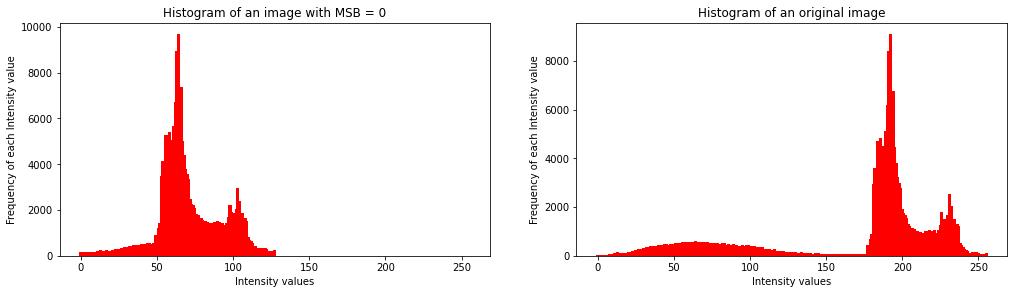

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(list(range(256)), hist_msb, color ='red',width = 2.0)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an image with MSB = 0')

plt.subplot(1, 2, 2)
plt.bar(list(range(256)), hist, color ='red',width = 2.0)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an original image')

plt.tight_layout(4)

plt.show()

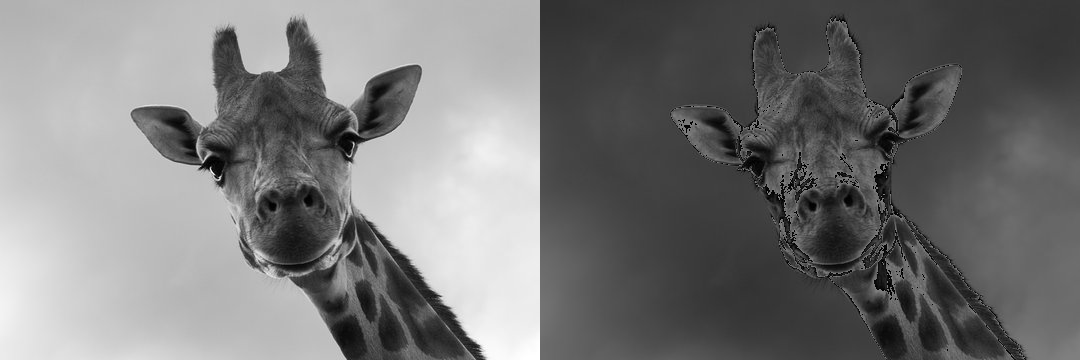

In [ ]:
show = cv2.hconcat([img,new_img_msb])
cv2_imshow(show)

# When we keep MSB = 0 for bitplane of an image then the intensity value of bitplane = 7 becomes 0 and all the intensity values >=128 of all pixels decreases by 128.

# **Q2) 3) keep the LSB bits in the bitplane to 0**

In [ ]:
new_img_lsb = img.copy()

In [ ]:
for i in range (img.shape[0]):
  for j in range (img.shape[1]):
    if img[i][j] & 1 == 1:
      new_img_lsb[i][j] = img[i][j] - 1

In [ ]:
hist_lsb = histogram(new_img_lsb)
hist = histogram(img)

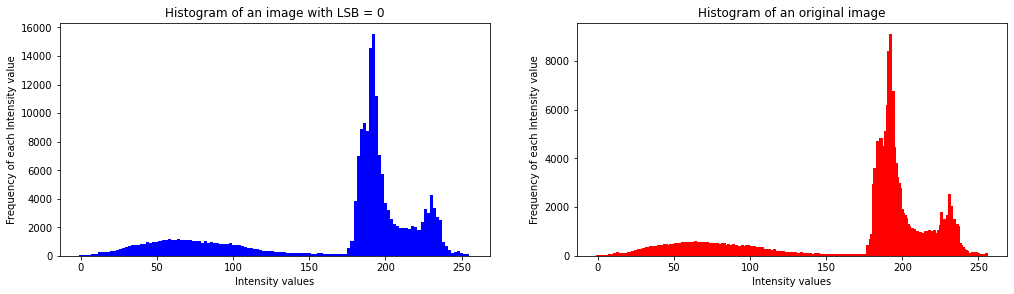

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(list(range(256)), hist_lsb, color ='blue',width = 2.0)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an image with MSB = 0')

plt.subplot(1, 2, 2)
plt.bar(list(range(256)), hist, color ='red',width = 2.0)
plt.xlabel('Intensity values')
plt.ylabel('Frequency of each Intensity value')
plt.title('Histogram of an original image')

plt.tight_layout(4)

plt.show()

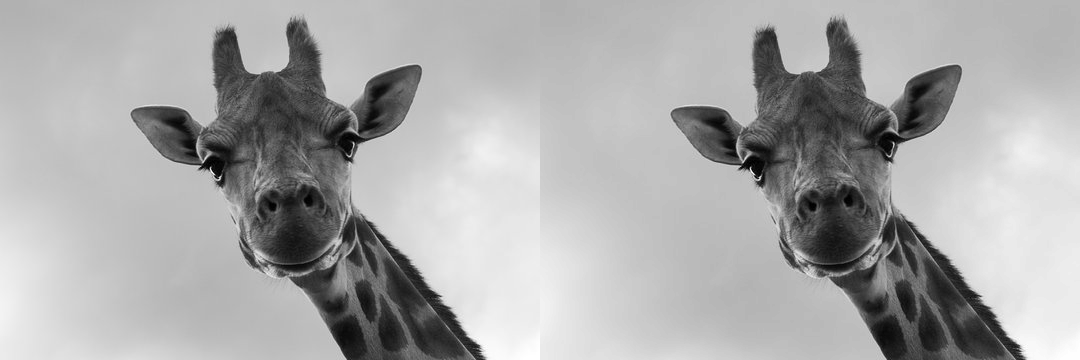

In [ ]:
show = cv2.hconcat([img,new_img_lsb])
cv2_imshow(show)

# When we keep LSB = 0 for bitplane of an image then the intensity value of bitplane = 0 becomes 0 if intially for bitplane 0 of an pixel the value was 1 or else it remains unchanged. Hence the intensity values get subtracted by atmost 1 when LSB = 1 and it heardly changes the intensity values after the transition is applied.

# **Q2) 4) Transmission is usually achieved through packets containing a start bit, a byte of information and a stop bit. Baud rate is a common measure for digital data transmission and is defined as number of bits transmitted per second. How much time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 56K baud link?**

In [ ]:
data = 512 * 512 * (1+8+1) # 1bit for start bit, 8 bits for data and 1 bit for stop bit
baud_rate = 56 * math.pow(10,3)

In [ ]:
time = data / baud_rate
print("time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 56K baud link:= ",time)

time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 56K baud link:=  46.81142857142857


# **Similarly, calculate the time required to transmit the same image over a 3000K baud link**

In [ ]:
data = 512 * 512 * (1+8+1)
baud_rate = 3000 * math.pow(10,3)
time = data / baud_rate
print("time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 3000K baud link:= ",time)

time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 3000K baud link:=  0.8738133333333333


# **Q3) function to create the negative of an image**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_1_data/food1.jpeg')
#cv2_imshow(img)

In [ ]:
def negative (i_min,i_max,img):
  img_temp = img.copy()
  width = img.shape[0]
  height = img.shape[1]
  for i in range (0,width):
    for j in range (0,height):
      img_temp [i][j] = i_max - img [i][j]
  return img_temp

In [ ]:
blue = negative (min(np.unique(img[:,:,0])),max(np.unique(img[:,:,0])),img[:,:,0])
green = negative (min(np.unique(img[:,:,1])),max(np.unique(img[:,:,1])),img[:,:,1])
red = negative (min(np.unique(img[:,:,2])),max(np.unique(img[:,:,2])),img[:,:,2])

In [ ]:
neg_img = cv2.merge((blue,green,red))

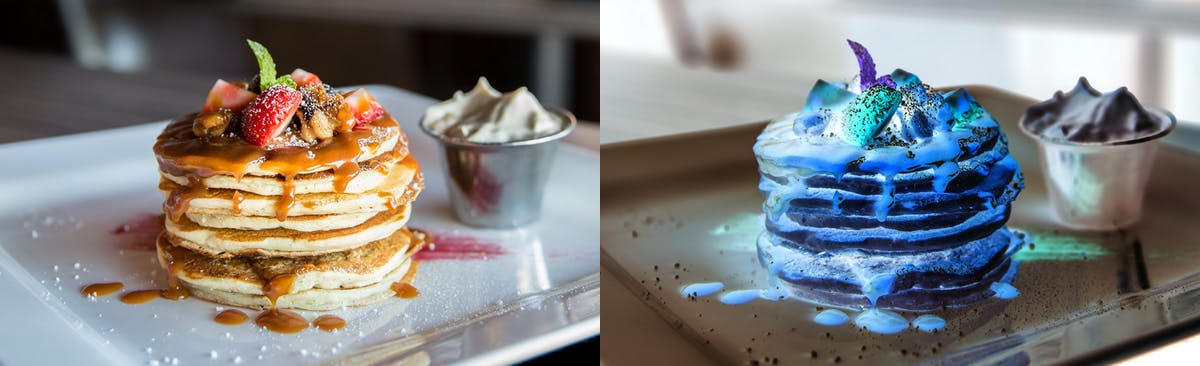

In [ ]:
show = cv2.hconcat([img,neg_img])
cv2_imshow(show)